# Supervised Machine Learning Regression - Task 6.4:  Gun Violence in US

1. [Import LIbraries and Data](#lib)

2. [Check Dataframe](#check)

3. [Data Cleaning](#clean)

4. [Regression Analysis](#analysis)

5. [Conclusions](#conclusions)

6. [Bonus Regression: Outlier Removal](#bonus)

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<div id = "lib"></div>

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
# Creating a path
path = r'C:\Users\rpa21\Gun Violence Analysis'

In [6]:
# importing data
df_guns2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'guns_2.csv'), index_col = False)

### 2.  Checking dataframe

<div id = "check"></div>

In [7]:
df_guns2.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,number_killed,number_injured,congressional_district,gun_stolen,...,longitude,number_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,sources
0,0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,...,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1,1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,NaN,...,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...
2,2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,...,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...
3,3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,...,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...
4,4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,...,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...


In [13]:
df_guns2.rename(columns = {'state' : 'STATE_NAME'}, inplace = True)

In [18]:
# extracting month, day, year to columns to use in analysis
df_guns2['date'] = pd.to_datetime(df_guns2['date'], format="%Y-%m-%d")
df_guns2['year'] = df_guns2['date'].dt.year.astype(str)
df_guns2['day'] = df_guns2['date'].dt.day_name()
df_guns2['month'] = df_guns2['date'].dt.month_name()
df_guns2['place'] = df_guns2['city_or_county']+', '+df_guns2['STATE_NAME']

In [19]:
df_guns2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0.1              239677 non-null  int64         
 1   Unnamed: 0                239677 non-null  int64         
 2   incident_id               239677 non-null  int64         
 3   date                      239677 non-null  datetime64[ns]
 4   STATE_NAME                239677 non-null  object        
 5   city_or_county            239677 non-null  object        
 6   number_killed             239677 non-null  int64         
 7   number_injured            239677 non-null  int64         
 8   congressional_district    227733 non-null  float64       
 9   gun_stolen                140179 non-null  object        
 10  gun_type                  140226 non-null  object        
 11  incident_characteristics  239351 non-null  object        
 12  la

### 3. Data Cleaning

<div id = "clean"></div>

In [22]:
# replacing missing numbers with median value
if 'age' in df_guns2.columns:
    df_guns2['age'].fillna(df_guns2['age'].median(), inplace=True)

# drop rows where any key column has a missing value
df_guns2.dropna(subset=['date', 'number_killed', 'number_injured'], inplace=True)


In [25]:
df_guns2 = df_guns2.drop(columns = ['Unnamed: 0','Unnamed: 0.1' ])

In [27]:
df_guns2.head()

,incident_id,date,STATE_NAME,city_or_county,number_killed,number_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,sources,year,day,month,place
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,2013,Tuesday,January,"Mckeesport, Pennsylvania"
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,2013,Tuesday,January,"Hawthorne, California"
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,2013,Tuesday,January,"Lorain, Ohio"
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,2013,Saturday,January,"Aurora, Colorado"
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,2013,Monday,January,"Greensboro, North Carolina"


In [ ]:
df_guns2.isnull().sum()

In [42]:
#remove unneccessary columns that are missing too much data

df_guns2 = df_guns2.drop(columns = ['participant_status', 'participant_type', 'sources', 'participant_gender'])

In [43]:
df_guns2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_id               239677 non-null  int64         
 1   date                      239677 non-null  datetime64[ns]
 2   STATE_NAME                239677 non-null  object        
 3   city_or_county            239677 non-null  object        
 4   number_killed             239677 non-null  int64         
 5   number_injured            239677 non-null  int64         
 6   congressional_district    227733 non-null  float64       
 7   incident_characteristics  239351 non-null  object        
 8   latitude                  231754 non-null  float64       
 9   longitude                 231754 non-null  float64       
 10  number_guns_involved      140226 non-null  float64       
 11  notes                     158660 non-null  object        
 12  pa

In [44]:
df_nan = df_guns2[df_guns2['number_guns_involved'].isnull() ==True]

In [ ]:
df_nan

In [46]:
df_guns2['number_guns_involved'].value_counts (dropna = False)

number_guns_involved
1.0      127548
NaN       99451
2.0        7477
3.0        2021
4.0         871
          ...  
158.0         1
189.0         1
85.0          1
96.0          1
127.0         1
Name: count, Length: 107, dtype: int64

In [49]:
# Find the median value of number_guns_involved
median_value = df_guns2['number_guns_involved'].median()

In [51]:
#replace missing values in variable
df_guns2['number_guns_involved'].fillna(median_value, inplace=True)

In [52]:
df_guns2.shape

(239677, 18)

In [53]:
 # Check the mean
df_guns2['number_killed'].mean() 

0.25228953967214207

In [54]:
# Check the median
df_guns2['number_killed'].median() 

0.0

In [55]:
# Check the max number
df_guns2['number_killed'].max() 

50

Preparation of Data for Regression Analysis

<div id = "analysis"></div>

C:\Users\rpa21\AppData\Local\Temp\ipykernel_33552\2340667967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_guns2['number_guns_involved'], bins=25) # Shows extreme values
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_guns_involved', ylabel='Density'>

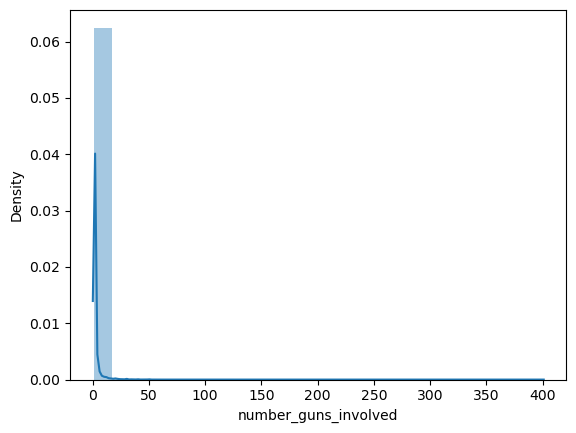

In [56]:
sns.distplot(df_guns2['number_guns_involved'], bins=25) # Shows extreme values

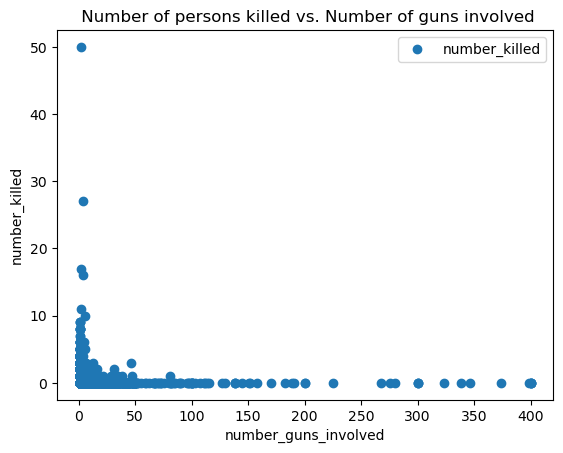

In [58]:
# Create a scatterplot with matplotlib to see how the variables plot against each other.

df_guns2.plot(x = 'number_guns_involved', y='number_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of persons killed vs. Number of guns involved')  
plt.xlabel('number_guns_involved')  
plt.ylabel('number_killed')  
plt.show()

Hypothesis:  The number of guns involved will affect the number of people killed.

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_guns2['number_guns_involved'].values.reshape(-1,1)
y = df_guns2['number_killed'].values.reshape(-1,1)

In [63]:
X

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [62]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [64]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [65]:
# Create a regression object. (This is the regression object, which will be fit onto the training set.)

regression = LinearRegression() 

In [66]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

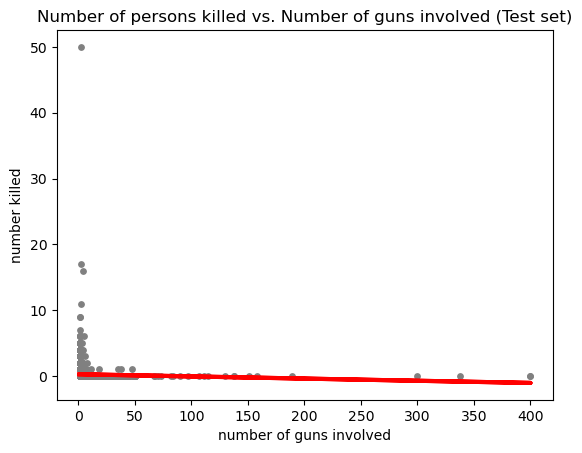

In [68]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of persons killed vs. Number of guns involved (Test set)')
plot_test.xlabel('number of guns involved')
plot_test.ylabel('number killed')
plot_test.show()

In [69]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) #(r2 score.) 

In [70]:
# Print the model summary statistics, evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00329439]]
Mean squared error:  0.3035168491968972
R2 score:  0.00034018721101936045


In [71]:
y_predicted

array([[0.25174024],
       [0.25174024],
       [0.25174024],
       ...,
       [0.25174024],
       [0.25174024],
       [0.25174024]])

In [72]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.25174
1,4,0.25174
2,0,0.25174
3,0,0.25174
4,0,0.25174
5,0,0.25174
6,0,0.25174
7,1,0.25174
8,0,0.25174
9,0,0.25174


#### How does the Regression fit the training set?

In [73]:
# Predict. This is predicting X_train.

y_predicted_train = regression.predict(X_train) 

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00329439]]
Mean squared error:  0.2586626892982444
R2 score:  0.0005418079642978135


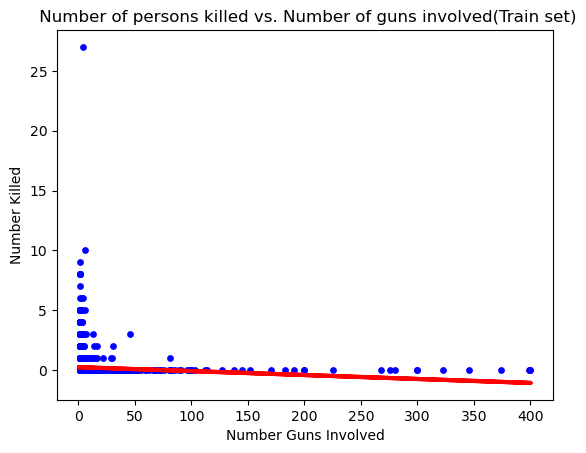

In [76]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title(' Number of persons killed vs. Number of guns involved(Train set)')
plot_test.xlabel('Number Guns Involved')
plot_test.ylabel('Number Killed')
plot_test.show()

<div id = "bonus"></div>

<div id = "conclusions"></div>

### 5. Conclusions

There is not much trend in the variables.  Some values run along the regression line but most are above the line. 
The line of regression does not cover the most ofthe data points.   The slope at -0.00329439, is a negative relationship, but doesn't tell us much more.  The Mean Aquared Error is -0.30351684, a negative relationship and suggests the regression line passes close to data.   The r2 score is 0.000340187, suggesting a very poor fit.  The model is not performing well. 

There is a large differnce between the actual and predicted values. THe model is not explaining the relatioship between hte number of people killed and the number of guns involved.  A regression line will not be able to predict anything. 


<div id = "bonus"></div>

There will be bias present, as the data is based on decisions made by humans.  Here, they are clearly very bad decisions.  The bias will be difficult to ascertain. 

### 6. Bonus Linear Regression: Outliers removed.

In [85]:
df_test = df_guns2[df_guns2['number_killed'] <=10] 

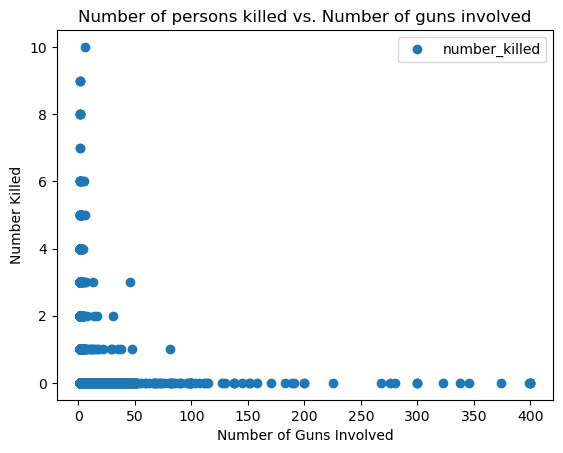

In [86]:
df_test.plot(x = 'number_guns_involved', y='number_killed', style='o')  
plt.title('Number of persons killed vs. Number of guns involved')  
plt.xlabel('Number of Guns Involved')  
plt.ylabel('Number Killed')  
plt.show()

In [87]:
# Reshape 

X_2 = df_test['number_guns_involved'].values.reshape(-1,1)
y_2 = df_test['number_killed'].values.reshape(-1,1)

In [88]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [89]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [90]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [91]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [92]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00326789]]
Mean squared error:  0.25424998965403484
R2 score:  0.0005348285608675063


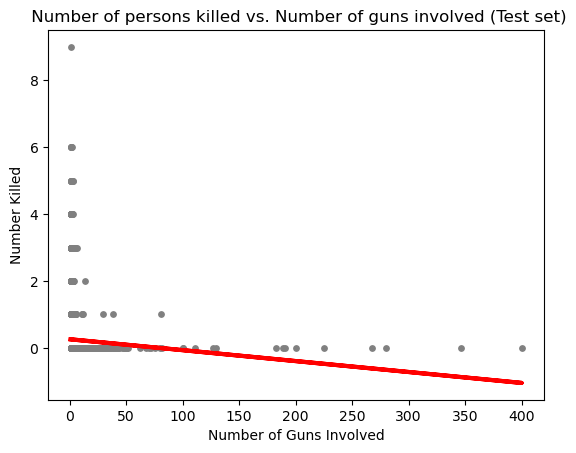

In [93]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title(' Number of persons killed vs. Number of guns involved (Test set)')
plot_test.xlabel('Number of Guns Involved')
plot_test.ylabel('Number Killed')
plot_test.show()

In [94]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.253114
1,0,0.253114
2,0,0.253114
3,0,0.253114
4,2,0.253114
5,1,0.253114
6,1,0.253114
7,0,0.253114
8,0,0.253114
9,0,0.253114


The conclustion, after outlier removal, is the same as the original regression.  Regression analysis will not be able to predict a relationship.

In [95]:
#Saving dataframe
df_guns2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'guns_3.csv'))